# Exploring blog posts according to gender

In [1]:
import logging
logging.basicConfig(level=logging.WARNING)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
df = pd.read_csv('blogtext.csv', parse_dates = ['date'])
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [2]:
%%time
#Preprocessing text
from clean import clean
from joblib import Parallel, delayed
df['tokens'] = Parallel(n_jobs=9)(delayed(clean)(line) for line in df['text'])

CPU times: user 2min 51s, sys: 10.1 s, total: 3min 1s
Wall time: 34min 40s


In [3]:
#Collecting length of the posts (both tokenized and non-tokenized)
df['length'] = df['text'].map(len)
df['tokenlen'] = df['tokens'].map(len)

# Word counts by gender

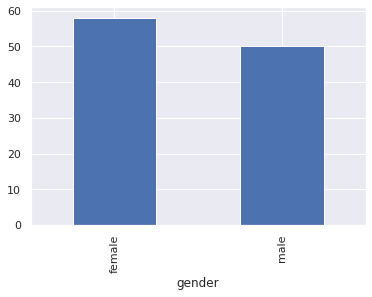

In [4]:
#Want to plot median word count by gender
df.groupby('gender')['tokenlen'].agg('median').plot(kind='bar')
# plt.figure(figsize=(9,9))

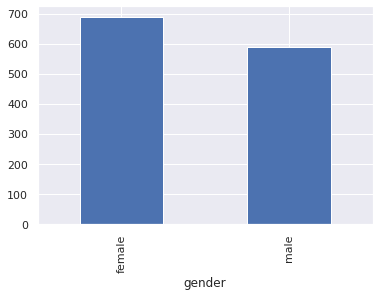

In [5]:
df.groupby('gender')['length'].agg('median').plot(kind='bar')
#Females write longer posts.

In [6]:
#find average length of the blogposts by class
def avlength(col):
    col.reset_index(drop=True,inplace=True)
    count = 0
    for i in range(1,len(col)):
        count += len(col[i])
    return count/(len(col))
print('Average blog post length (in tokens): ', avlength(df['tokens']))

Average blog post length (in tokens):  95.7634730890495


In [29]:
male = df[df['gender']=='male']
female = df[df['gender']=='female']

print("Avg length of a male blog post: ", avlength(male['tokens']), '\n',
      "Avg length of a female blog post: ", avlength(female['tokens']))
#Male token lengths appear a bit longer.

Avg length of a male blog post:  94.14345308276819 
 Avg length of a female blog post:  97.42715514548144


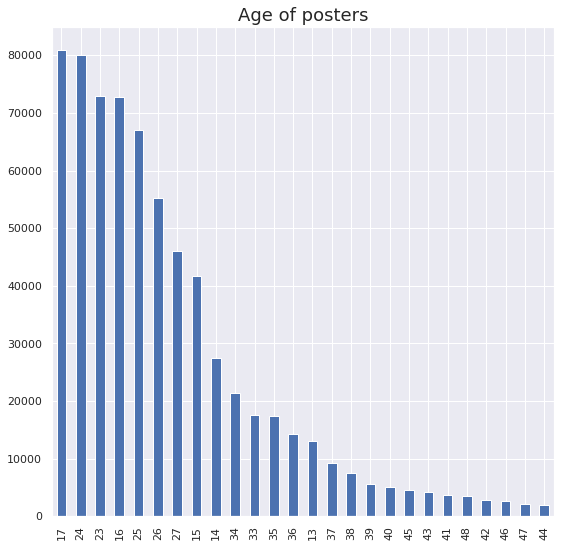

In [12]:
plt.figure(figsize=(9,9))
plt.title('Age of posters', fontsize=18)
df.age.value_counts().plot(kind='bar')

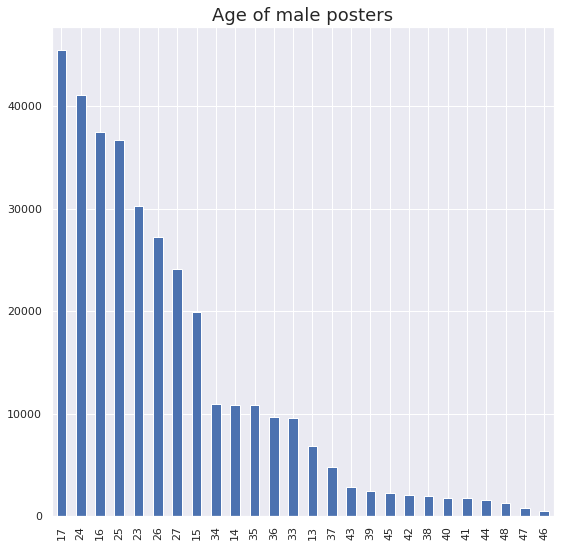

In [13]:
plt.figure(figsize=(9,9))
plt.title('Age of male posters',fontsize=18)
male.age.value_counts().plot(kind='bar')

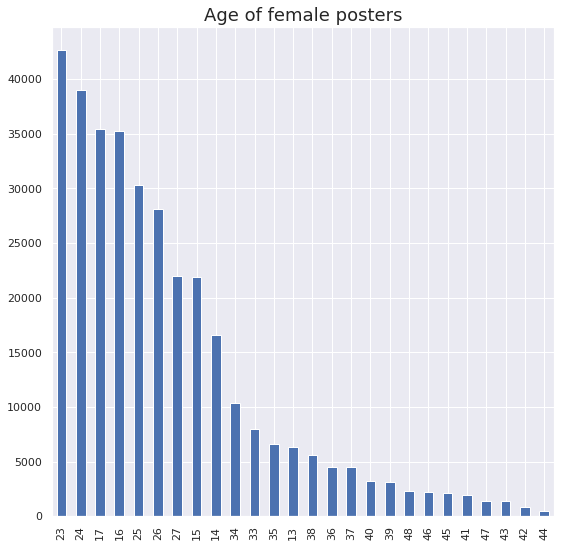

In [14]:
plt.figure(figsize=(9,9))
plt.title("Age of female posters", fontsize=18)
female.age.value_counts().plot(kind='bar')

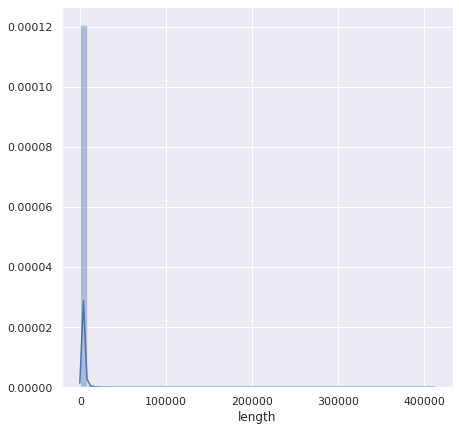

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(male['length'])

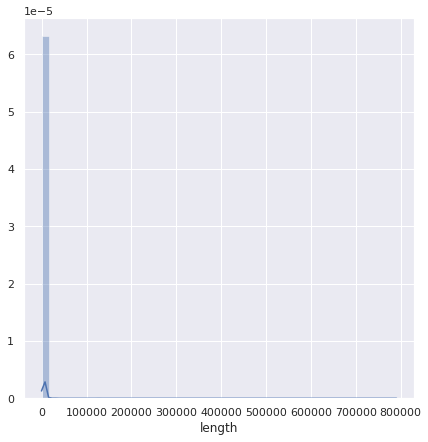

In [16]:
plt.figure(figsize=(7,7))
sns.distplot(female['length'])

In [17]:
from gensim.models import Word2Vec
males = [doc for doc in male['tokens']]
malemodel = Word2Vec(males, size=275, window=8, min_count=4, workers = 3)
females = [doc for doc in female['tokens']]
femalemodel = Word2Vec(females, size=275, window=8, min_count=4, workers = 3)

In [18]:
malewords = malemodel.wv.index2entity[:150]
femalewords = femalemodel.wv.index2entity[:150]
print(malewords)

['have', 'you', 'much', 'all', 'good', 'just', 'make', 'his', 'her', 'she', 'your', 'people', 'thing', 'come', 'take', 'want', 'how', 'back', 'work', 'them', 'little', 'here', 'look', 'feel', 'after', 'way', 'him', 'new', 'year', 'into', 'today', 'love', 'last', 'may', 'too', 'right', 'find', 'very', 'need', 'still', 'tell', 'life', 'give', 'start', 'try', 'use', 'friend', 'call', 'play', 'leave', 'night', 'man', 'long', 'talk', 'read', 'yes', 'great', 'home', 'lot', 'post', 'mean', 'week', 'guy', 'write', 'let', 'end', 'live', 'school', 'world', 'late', 'many', 'few', 'watch', 'old', 'ask', 'keep', 'place', 'through', 'game', 'god', 'always', 'run', 'happen', 'big', 'pretty', 'movie', 'actually', 'maybe', 'okay', 'bad', 'hope', 'hour', 'sure', 'myself', 'fun', 'stuff', 'someone', 'point', 'name', 'put', 'away', 'house', 'help', 'change', 'part', 'turn', 'hear', 'head', 'doe', 'girl', 'such', 'wrong', 'interest', 'guess', 'word', 'nice', 'book', 'fuck', 'wait', 'bite', 'meet', 'cool', 

In [19]:
print(femalewords)

['have', 'you', 'all', 'much', 'just', 'good', 'she', 'her', 'make', 'want', 'thing', 'your', 'him', 'his', 'love', 'feel', 'come', 'how', 'take', 'people', 'back', 'little', 'them', 'work', 'look', 'here', 'tell', 'today', 'too', 'way', 'last', 'friend', 'need', 'after', 'still', 'life', 'year', 'very', 'night', 'right', 'into', 'find', 'may', 'try', 'call', 'talk', 'new', 'yes', 'start', 'home', 'give', 'leave', 'long', 'week', 'lot', 'mean', 'let', 'read', 'guy', 'okay', 'live', 'man', 'use', 'write', 'always', 'ask', 'watch', 'school', 'keep', 'great', 'myself', 'fun', 'old', 'end', 'maybe', 'play', 'someone', 'late', 'house', 'bad', 'girl', 'actually', 'hope', 'low', 'away', 'happen', 'god', 'through', 'sure', 'many', 'hour', 'place', 'happy', 'few', 'guess', 'eat', 'pretty', 'nice', 'big', 'world', 'stuff', 'run', 'post', 'sit', 'wait', 'help', 'walk', 'head', 'put', 'hear', 'name', 'morning', 'sleep', 'mon', 'person', 'movie', 'turn', 'meet', 'book', 'until', 'miss', 'hard', 'ch

In [20]:
#Most frequent male words that aren't most frequent female words
[word for word in malewords if word not in femalewords]

['game',
 'point',
 'interest',
 'fuck',
 'probably',
 'far',
 'song',
 'job',
 'lose',
 'must',
 'story',
 'quite']

In [21]:
#Most frequent female words that aren't most frequent male words
[word for word in femalewords if word not in malewords]

['happy',
 'mon',
 'miss',
 'hate',
 'kid',
 'soon',
 'tomorrow',
 'kind',
 'family',
 'care',
 'break',
 'thank']

In [36]:
text = df['tokens']

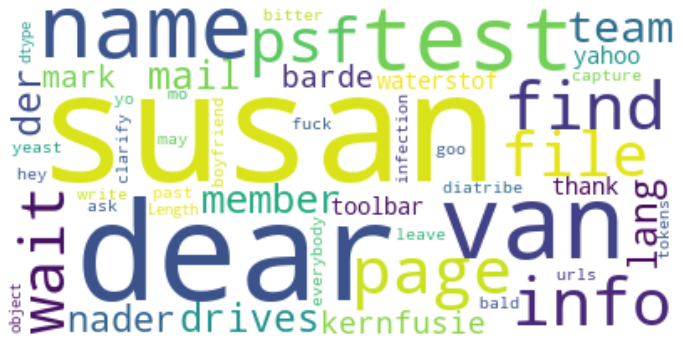

In [24]:
plt.figure(figsize=(12,12))
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, 
                      contour_width=3, contour_color='steelblue')# Generate a word cloud
cloud=wordcloud.generate(str(text))
plt.axis("off")
plt.imshow(cloud, interpolation='bilinear')
#Why are nbsp and urllink here

In [27]:
df['token_str'] = df['tokens'].map(lambda x: ' '.join(x))

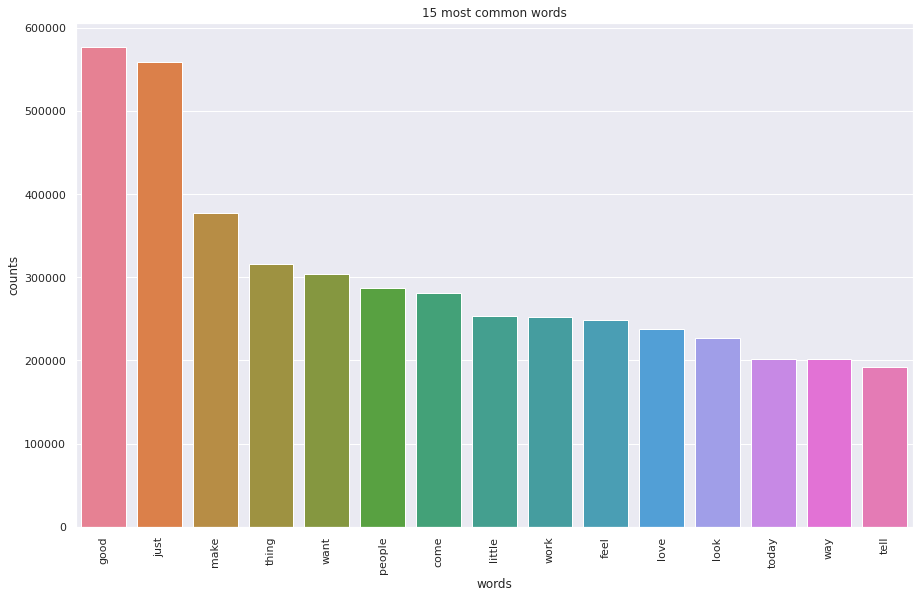

In [28]:
#Showing most common words and their counts:
#From a blog post by Susan Li
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline 
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['token_str'])
plot_15_most_common_words(count_data, count_vectorizer)

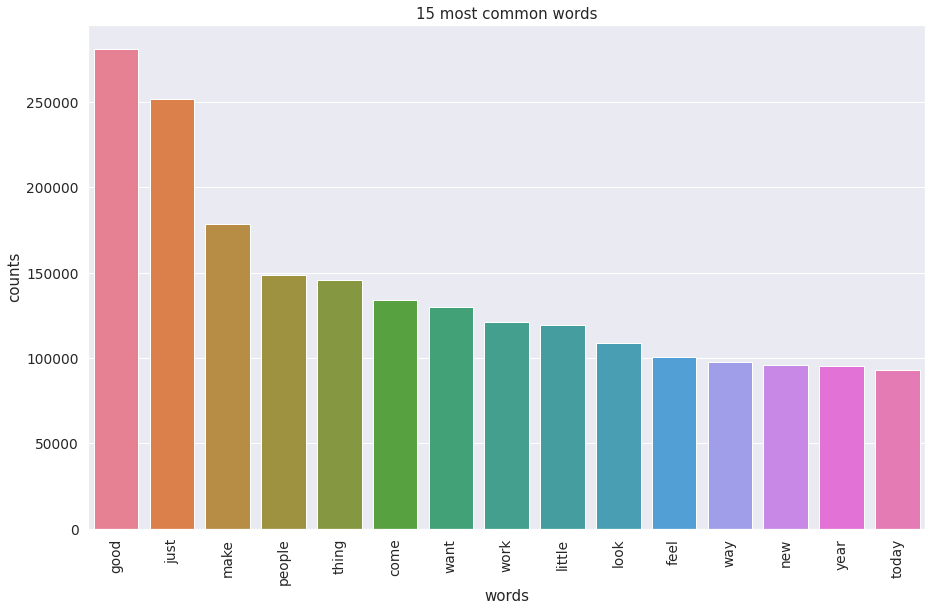

In [34]:
count_male = count_vectorizer.fit_transform(male['token_str'])
plot_15_most_common_words(count_male, count_vectorizer)
#Most common male words and their counts

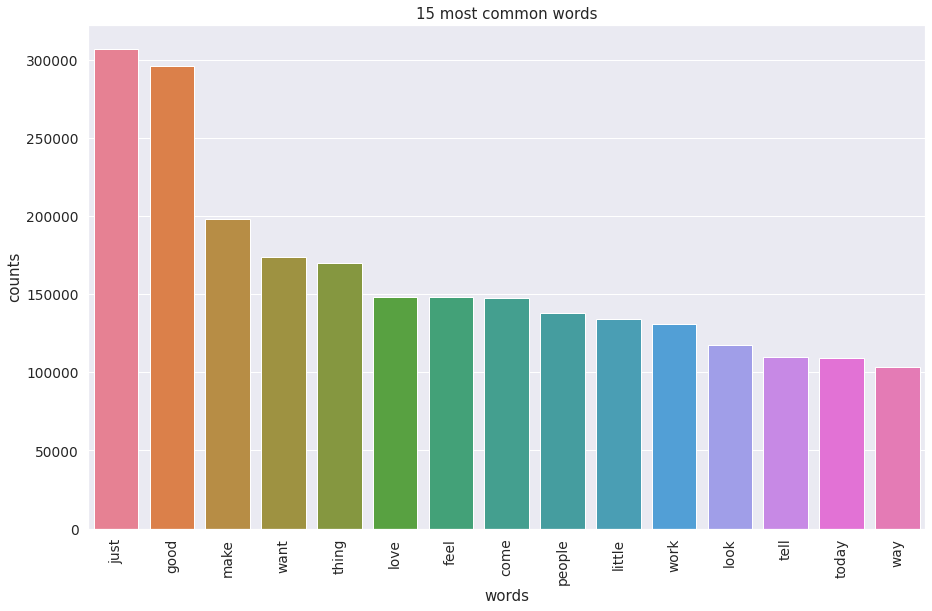

In [32]:
count_female = count_vectorizer.fit_transform(female['token_str'])
plot_15_most_common_words(count_female, count_vectorizer)
#Most common female words and their counts